<a href="https://colab.research.google.com/github/sjcorp/notebooks/blob/master/ml_fundamentals/ml_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Files from Google Drive or Github Directly

In [1]:
## Import Files from Google Drive OR GitHub

# From Google Drive
gdurltitanic = 'https://drive.google.com/file/d/15tUbXaTIktuLzNjTq6euUHqBpGNuz7u6/view?usp=sharing'
gdtitanic = 'https://drive.google.com/uc?export=download&id='+gdurltitanic.split('/')[-2]

# From GitHub
githousing = 'https://raw.githubusercontent.com/sjcorp/notebooks/master/datasets/housing/train.csv'

# Import Libraries

In [2]:
# Import Primary Libraries
import sys
import scipy
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load Visualization Libraries
from pandas.plotting import scatter_matrix

# Load Data Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Load Data Evaluation Libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load, Analyze & Visualize Data

In [3]:
# Load Data
dataset = sns.load_dataset('iris')

In [4]:
# Analyze Data
print(dataset.shape) # Number of Row & Columns
print(dataset.head) # Top 5 & Bottom 5 Rows
print(dataset.describe()) # Statistical Summary
print(dataset.groupby('species').size()) # Distribution of the dependent variable in the given dataset

(150, 5)
<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000  

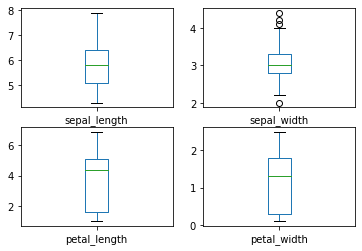

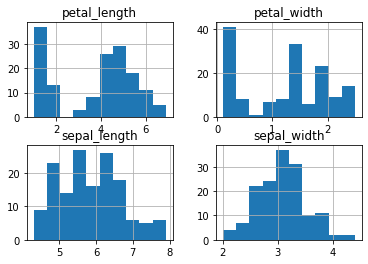

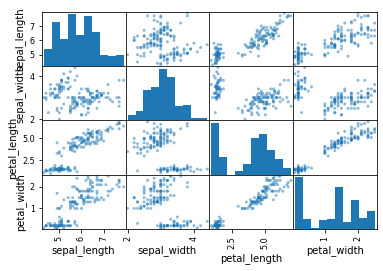

In [5]:
# Visualize Data
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False) # box and whisker plots
plt.show()
dataset.hist() # histograms
plt.show()
scatter_matrix(dataset) # scatter plot matrix
plt.show()

# Feature Engineering - Missing Values

# Feature Engineering - Standardization & Normalization

# Feature Engineering - Scaling

# Feature Selection

# Final Data Frame

# Train-Test Split

In [6]:
# Separate Feature & Response Variable; split them into test and train data
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Run & Compare Algorithms

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.933333 (0.050000)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


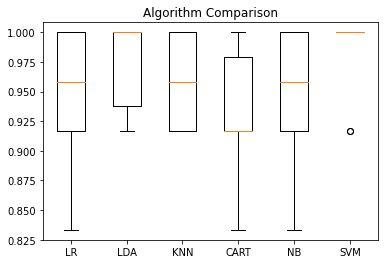

In [7]:
# LList Algorithms to Compare
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) # Used for binary output
models.append(('LDA', LinearDiscriminantAnalysis())) # 
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Train Algorithms
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 
# Evaluate Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Make Prediction Using Selected Algorithm

In [8]:
# Make Predictions
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Create Pipeline

# Save Model as PKL File for Deployment with Flask

# Get Data for requirements.txt file

In [9]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.10.0
scipy==1.4.1
scikit-learn==0.22.1
pandas==1.0.3
numpy==1.18.2
matplotlib==3.2.1
